In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy as sp
from scipy import stats

In [2]:
data_df = pd.read_csv('기초 데이터.csv')

data_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,연령,성별,학력,소득,지역,시군,동읍면,접근,역량,활용,WT,점수,연령_cut
0,0,0,0,11053,52,2,2,1,1,1,1,100,21.428571,32.820513,1.00,41.699634,10
1,1,1,1,16026,50,2,2,2,14,2,2,75,21.428571,52.051282,1.00,44.391941,10
2,2,2,2,16346,49,2,4,1,15,1,1,75,50.000000,37.820513,1.00,50.128205,9
3,3,3,3,10734,22,2,3,2,1,1,1,75,50.000000,65.128205,1.02,62.272308,4
4,4,4,4,14340,35,2,3,2,9,1,1,100,64.285714,57.051282,1.01,69.220147,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6995,6995,6995,15959,89,1,1,1,14,2,2,0,0.000000,0.000000,0.94,0.000000,11
6996,6996,6996,6996,14859,90,2,1,7,9,1,1,75,0.000000,0.000000,0.99,14.850000,11
6997,6997,6997,6997,12318,92,1,1,2,4,1,1,75,0.000000,0.000000,0.93,13.950000,11
6998,6998,6998,6998,15074,93,2,1,1,10,2,2,0,0.000000,0.000000,0.95,0.000000,11


### 소득과 점수 간 상관관계

In [3]:
data_소득_df = data_df[['소득','점수']]
data_소득_df.head()

# 소득 1: 50만원 이하, 2: 50~99만원, 3: 100~149, 4: 150~199, 5: 200~249, 6: 250~299, 7: 300~349, 8: 350~399, 9: 400~499, 10: 500~599, 11: 600만원 이상 (월 평균 소득 기준)

,소득,점수
0,1,41.699634
1,2,44.391941
2,1,50.128205
3,2,62.272308
4,2,69.220147


In [5]:
how_many_소득_df = pd.DataFrame(data_소득_df['소득'].value_counts())

how_many_소득_df

,소득
9,1558
10,1317
7,907
8,849
11,630
6,462
5,434
4,325
3,276
2,195


<AxesSubplot:>

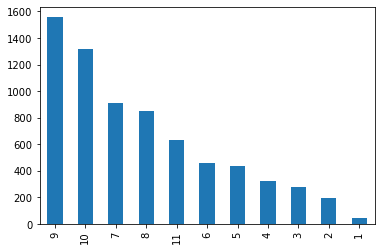

In [6]:
how_many_소득_df['소득'].plot(kind="bar")

In [7]:
pd.crosstab(data_소득_df['점수'], data_소득_df['소득'], margins=True)

소득,1,2,3,4,5,6,7,8,9,10,11,All
점수,,,,,,,,,,,,
0.0,7,14,11,14,5,4,2,1,1,0,0,59
2.7142857142857144,0,0,0,0,0,0,1,0,0,0,0,1
2.8,0,0,0,0,1,0,0,0,0,0,0,1
4.8,0,0,0,1,0,0,0,0,0,0,1,2
4.85,0,0,0,1,0,0,2,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
111.2,0,0,0,0,0,0,0,0,0,0,1,1
112.12307692307692,0,0,0,0,0,0,0,0,0,1,0,1
130.9230769230769,0,0,0,0,1,0,0,0,0,0,0,1


귀무가설:소득과 정보화 수준 점수는 관련이 없다.
대립가설:소득과 정보화 수준 점수는 관련이 있다.

In [8]:
stats.chisquare(data_소득_df['소득'], data_소득_df['점수'])

# Pvalue = 0.0이므로 귀무가설 기각, 대립가설 채택

C:\Users\mycom123\Anaconda3\lib\site-packages\scipy\stats\stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

In [10]:
stats.chisquare(data_소득_df['점수'], data_소득_df['소득'])

# 변수 간 선후관계를 바꿔봐도 Pvalue = 0.0이므로 귀무가설 기각, 대립가설 채택

Power_divergenceResult(statistic=3733478.2786094733, pvalue=0.0)

### 변수 간 상관계수 파악

In [11]:
data_소득_df.corr()

# -1에 가까울수록 음의 상관관계, 1에 가까울수록 양의 상관관계, 0에 가까울수록 상관관계가 적음
# 보통 상관계수가 0.7보다 클 경우 강한 양의 상관관계가, -0.7보다 작을 경우 강한 음의 상관관계(하나가 증가할 경우 다른 하나는 감소한다)가 있다고 판단함.

,소득,점수
소득,1.000000,0.551924
점수,0.551924,1.000000


### 결론 : 소득이 높을수록 정보화 수준 점수도 높음. (양의 상관관계) 

Text(0.5, 1.0, '소득과 정보화 점수 간 상관관계')

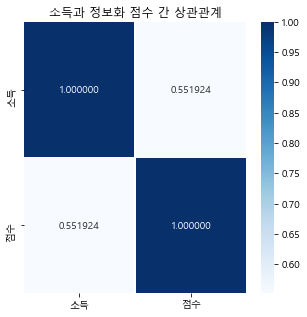

In [12]:
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False # 범주에 - 표시
plt.figure(figsize=(5,5))
sns.heatmap(data = data_소득_df.corr(), annot=True, 
fmt = 'f', linewidths=.5, cmap='Blues')
plt.title('소득과 정보화 점수 간 상관관계')